**Notebook 2 Fetching and cleaning stock price data, calculating returns, initial sanity checks**

In [1]:
#Load close Prices data
import pandas as pd

url = "../Data/close_prices.csv"

closePrices = pd.read_csv(url,index_col="Date")
print(closePrices.columns)



Index(['HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS'], dtype='object')


In [2]:
#Understand the data 
print(closePrices.shape)
print(closePrices.head(1))
print(closePrices.tail(1))

(1240, 5)
            HDFCBANK.NS  ICICIBANK.NS     INFY.NS  RELIANCE.NS      TCS.NS
Date                                                                      
2020-06-03   981.338135    347.804016  629.244812   706.661255  1842.21106
            HDFCBANK.NS  ICICIBANK.NS  INFY.NS  RELIANCE.NS       TCS.NS
Date                                                                    
2025-06-03  1924.599976   1437.900024   1543.0       1405.5  3375.199951


In [3]:
#calculate the returns 
returns = closePrices.pct_change()

returns

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-06-03,NaN,NaN,NaN,NaN,NaN
2020-06-04,-0.020103,-0.025221,0.008838,0.024746,0.022188
2020-06-05,0.031596,0.026879,-0.005934,0.001203,-0.020702
2020-06-08,-0.016887,0.007279,0.024590,-0.007713,0.011473
2020-06-09,-0.028152,-0.031267,-0.004509,-0.020612,0.000145
...,...,...,...,...,...
2025-05-28,-0.001454,0.005116,0.001083,-0.006469,-0.000286
2025-05-29,0.002080,0.001857,0.008780,0.003468,0.000114
2025-05-30,0.009027,-0.007346,-0.000576,0.002186,-0.009920


In [4]:
#drop the first row with NaN values
returns = returns.dropna()

returns 

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-06-04,-0.020103,-0.025221,0.008838,0.024746,0.022188
2020-06-05,0.031596,0.026879,-0.005934,0.001203,-0.020702
2020-06-08,-0.016887,0.007279,0.024590,-0.007713,0.011473
2020-06-09,-0.028152,-0.031267,-0.004509,-0.020612,0.000145
2020-06-10,0.004609,0.012767,-0.002439,0.022769,0.017712
...,...,...,...,...,...
2025-05-28,-0.001454,0.005116,0.001083,-0.006469,-0.000286
2025-05-29,0.002080,0.001857,0.008780,0.003468,0.000114
2025-05-30,0.009027,-0.007346,-0.000576,0.002186,-0.009920


In [5]:
#Check the shape, columns, and NaN values in the returns DataFrame
print(returns.shape)
print(returns.columns)
print(returns.isna().any().any())

(1239, 5)
Index(['HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS'], dtype='object')
False


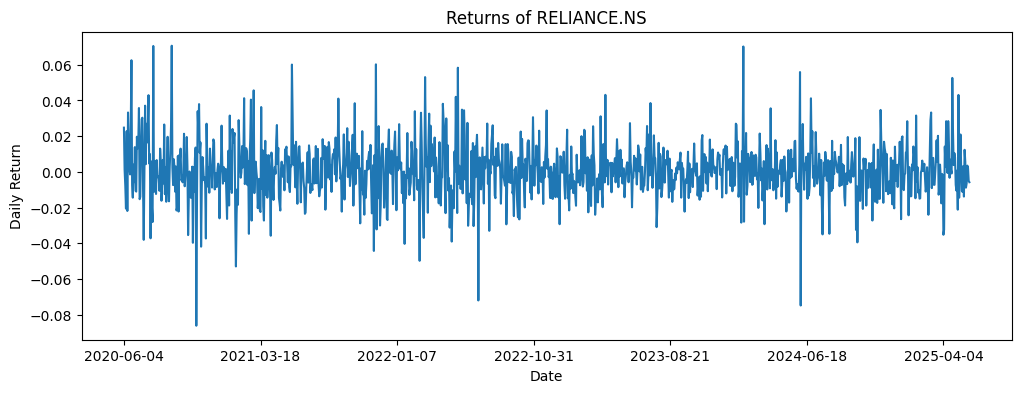

In [6]:
## Visualize the returns for one stock for sanity check
import seaborn as sb
import matplotlib.pyplot as plt

# Plot returns for one stock (e.g., RELIANCE.NS)
returns["RELIANCE.NS"].plot(figsize=(12, 4), title="Returns of RELIANCE.NS")
plt.ylabel("Daily Return")
plt.show()


In [7]:
## Save the returns DataFrame to a CSV file in the Data folder
import os

# Ensure the directory exists
os.makedirs("../Data", exist_ok=True)

# Save the Close prices to CSV in the existing Data folder
returns.to_csv("../Data/daily_returns.csv")